#Tugas Final Project Pembelajaran Mesin D
---
#Kelompok 4
Anggota :
1. Rumaisha Afrina (5025221146)
2. Helsa Sriprameswari Putri (5025221154)
3. Furstin Aprilavia Putri (5025221234)
4. Nabhyla Niagara Rannuan (5025221286)
5. Muhammad Faisal Rafi (5025231295)
---

Jenis pembelajaran mesin yang digunakan adalah
---

Supervised learning - Klasifikasi
---
---

Tujuan : Mengklasifikasikan minuman berdasarkan skor Nutri-Score.
---

Nutri-Score adalah sistem label nutrisi yang mengklasifikasikan ksehatan berdasarkan Nutri Score di minuman tersebut

Nutri Score berisikan :
1. A (Terbaik)
2. B
3. C
4. D
5. E (Terburuk)

berdasarkan nilai nutrisi per 100 ml,

---

kandungannya berupa
1. Energi
2. Lemak
3. Gula
4. Garam
5. Serat
6. Protein
---
Model yang digunakan Berupa
---
1. Decision Tree
2. K-Nearest Neighbors
3. Random Forest
4. XGBoost
5. Support Vector Machine






---
#***Dataset***
---

Pengumpulan data berdasarkan scraping dari situs Open Food Facts
---
---



In [1]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/nabhylanr/ML-NutriScore/main/minuman.csv"
df = pd.read_csv(url)

df.head()

,Kategori,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml)
0,fruit-juices,Cappy pulpy,e,155.0,0.0,0.0,9.0,7.0,NaN,0.0,0.050000
1,fruit-juices,PRESSup,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.000003
2,fruit-juices,Press up,c,226.0,0.1,0.0,13.0,5.5,0.1,0.4,0.002500
3,fruit-juices,Shot de gingembre bio,c,142.0,0.5,0.1,7.9,7.6,0.0,0.5,0.010000
4,fruit-juices,Jutos,d,66.8,0.0,0.0,10.0,8.0,0.0,0.0,0.050000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kategori                    811 non-null    object 
 1   Nama_minuman                800 non-null    object 
 2   Nutri_Score                 811 non-null    object 
 3   Energy (Per 100 ml)         811 non-null    float64
 4   Fat (Per 100 ml)            811 non-null    float64
 5   Saturated fat (Per 100 ml)  776 non-null    float64
 6   Carbohydrates (Per 100 ml)  810 non-null    float64
 7   Sugars (Per 100 ml)         803 non-null    float64
 8   Fiber (Per 100 ml)          510 non-null    float64
 9   Proteins (Per 100 ml)       811 non-null    float64
 10  Salt (Per 100 ml)           811 non-null    float64
dtypes: float64(8), object(3)
memory usage: 69.8+ KB


---
#***Data Preprocessing***
---

Missing Value
---
---

In [3]:
misval_cek = {
    'Missing Values':df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum()/df.shape[0]).round(2)*100),
    'Data Type': df.dtypes
    }

misval=pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),35,4.0,float64
Carbohydrates (Per 100 ml),1,0.0,float64
Sugars (Per 100 ml),8,1.0,float64
Fiber (Per 100 ml),301,37.0,float64
Proteins (Per 100 ml),0,0.0,float64


In [4]:
kolom_fitur = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)',
               'Saturated fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
               'Sugars (Per 100 ml)', 'Fiber (Per 100 ml)',
               'Proteins (Per 100 ml)', 'Salt (Per 100 ml)']

for kolom in kolom_fitur:
  if df[kolom].isnull().any():
    median_val = df[kolom].median()
    df[kolom] = df[kolom].fillna(median_val)

In [5]:
misval_cek = {
    'Missing Values': df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum() / df.shape[0]).round(2) * 100),
    'Data Type': df.dtypes
}

misval = pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Kategori,0,0.0,object
Nama_minuman,11,1.0,object
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64


Label Encoding
---
---

In [6]:
from sklearn.preprocessing import LabelEncoder

y = df['Nutri_Score']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [7]:
for label, class_ in enumerate(le.classes_):
    print(f"Class {label}: {class_}")

Class 0: b
Class 1: c
Class 2: d
Class 3: e


Seleksi Fitur
---
---

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

use_feature_selection = True # ubah true

X = df[kolom_fitur]

if use_feature_selection:
    selector = SelectKBest(score_func=f_classif, k=5)
    X_selected = selector.fit_transform(X, y)
    selected_mask = selector.get_support()
    features_used = [f for f, selected in zip(kolom_fitur, selected_mask) if selected]
    X = pd.DataFrame(X_selected, columns=features_used)
else:
    features_used = kolom_fitur

Splitting Data
---
---

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [10]:
print("X_train (data latih fitur):", X_train.shape)
print("X_test (data uji fitur):", X_test.shape)
print("y_train (data latih target):", y_train.shape)
print("y_test (data uji target):", y_test.shape)

X_train (data latih fitur): (648, 5)
X_test (data uji fitur): (163, 5)
y_train (data latih target): (648,)
y_test (data uji target): (163,)


Scalling Data
---
---

In [11]:
from sklearn.preprocessing import StandardScaler
#Setelah Split agar erdasarkan data asli dulu baru setelahnya setelah data training
#X = df[kolom_fitur]

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns=features_used)
X_test_df = pd.DataFrame(X_test, columns=features_used)

#columns=X.columns

---
#***Training Model***
---





In [12]:
X_train_df.head()

,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml)
0,-0.786953,-0.388852,-0.267113,-0.820505,-0.165156
1,7.840430,5.774914,3.390294,3.837698,3.360021
2,0.074800,-0.388852,-0.267113,0.606800,1.051656
3,0.138816,0.094581,0.123484,-0.132803,0.031681
4,0.094497,-0.388852,-0.267113,0.606800,1.051656


Decision Tree
---
---

Nabhyla Niagara Rannuan - 5025221286

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=17)
dtc_model.fit(X_train, y_train)

# predict
y_pred_dtc = dtc_model.predict(X_test)

# accuracy
dt_accuracy = round(accuracy_score(y_test, y_pred_dtc), 4) * 100
print(f"Akurasi Model: {dt_accuracy}%")

Akurasi Model: 77.3%


In [14]:
# max depth optimal
for i in [11,13,15,17,19]:
    check = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 11 = 0.7239263803680982
Akurasi max depth 13 = 0.754601226993865
Akurasi max depth 15 = 0.754601226993865
Akurasi max depth 17 = 0.7730061349693251
Akurasi max depth 19 = 0.7484662576687117


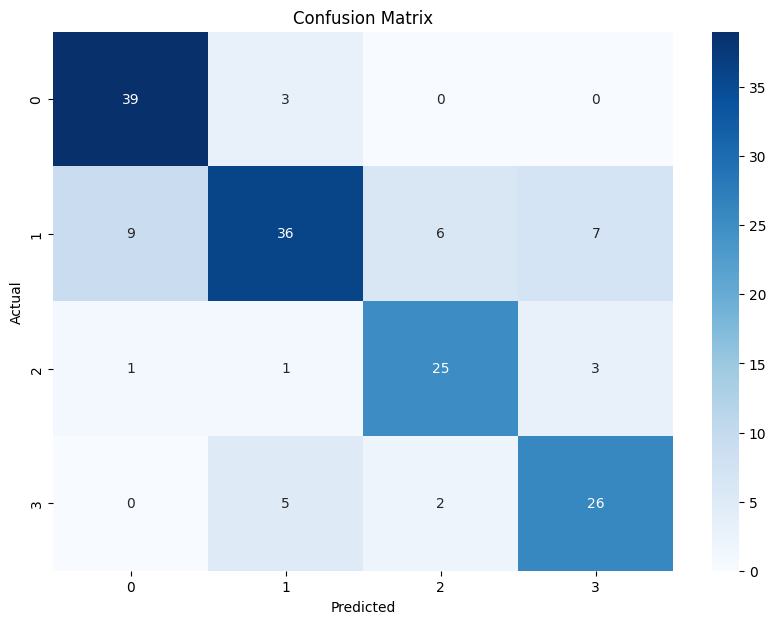

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc, average='macro')
recall = recall_score(y_test, y_pred_dtc, average='macro')
f1 = f1_score(y_test, y_pred_dtc, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.7730061349693251
Precision: 0.7689290867862297
Recall: 0.7926183012389909
F1-Score: 0.7759


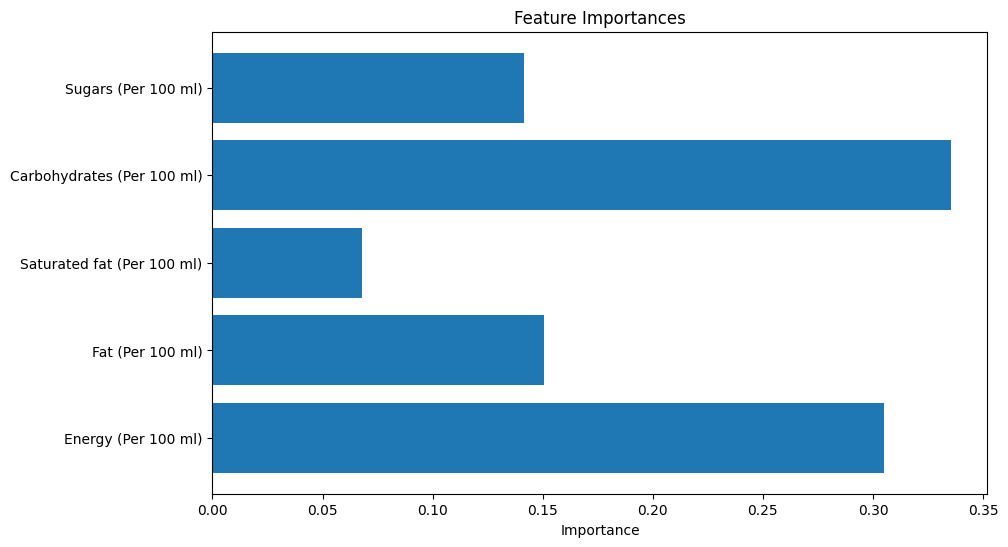

In [17]:
feature_importances = dtc_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_used, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

KNN
---
---

Rumaisha Afrina (5025221146)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

k_initial = 1

knn_model = KNeighborsClassifier(n_neighbors = k_initial)

knn_model.fit(X_train, y_train)

# predict
y_pred_knn = knn_model.predict(X_test)

# accuracy
knn_accuracy = round(accuracy_score(y_test, y_pred_knn), 4) * 100

print(f"Akurasi Model: {knn_accuracy}%")

cm = confusion_matrix(y_test, y_pred_knn)

Akurasi Model: 82.82000000000001%


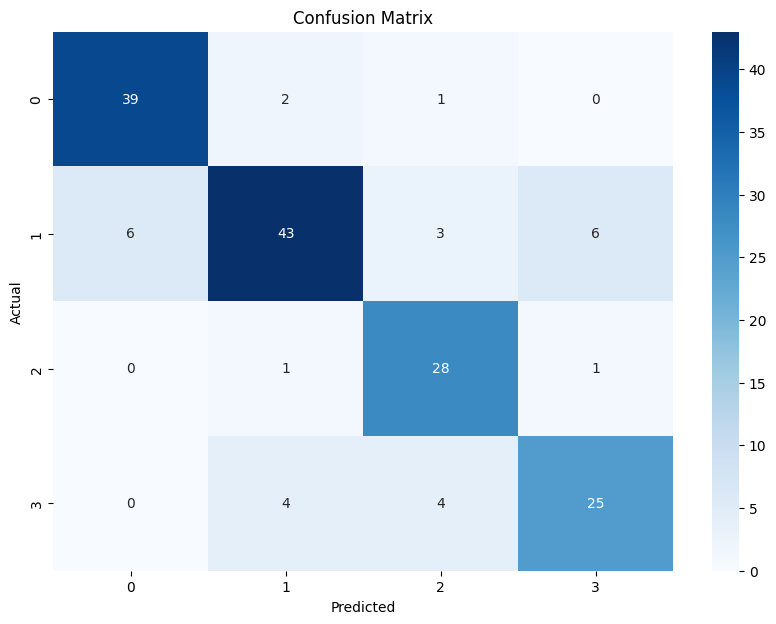

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8282208588957055
Precision: 0.8214236111111111
Recall: 0.8402149574563369
F1-Score: 0.8276


Random Forest
---
---


Furstin Aprilavia Putri - 5025221234

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

# predict
y_pred_rf = rf_model.predict(X_test)

# accuracy
rf_accuracy = round(accuracy_score(y_test, y_pred_rf), 4) * 100
print(f"Akurasi Model: {rf_accuracy}%")

Akurasi Model: 81.6%


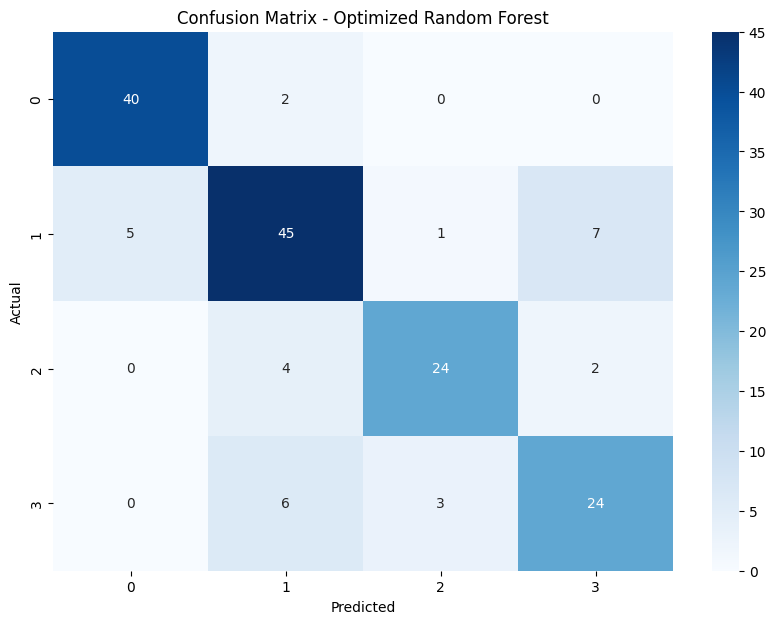

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.show()

In [23]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8159509202453987
Precision: 0.8156945393787498
Recall: 0.8138789371547992
F1-Score: 0.8143


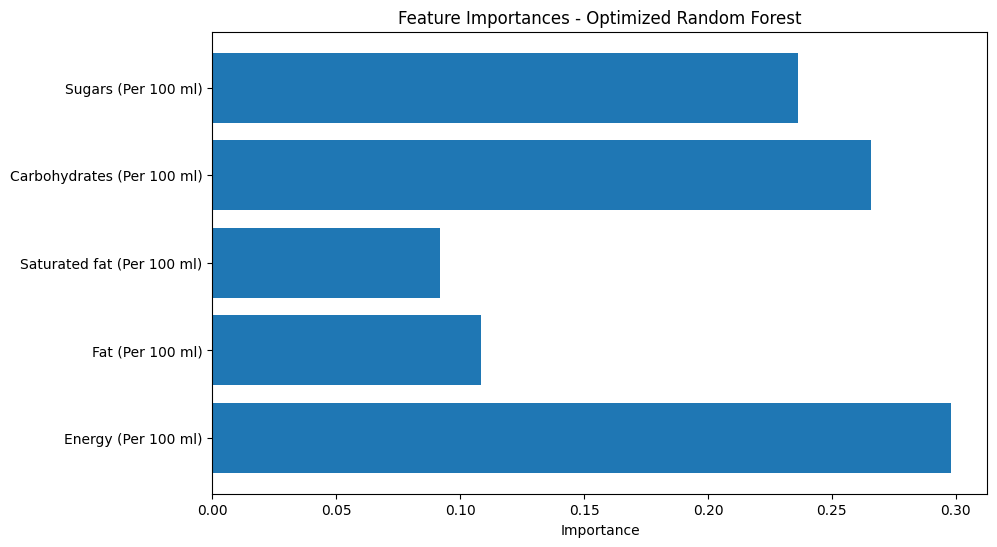

In [24]:
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_used, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances - Optimized Random Forest')
plt.show()

XGBoost
---
---

Helsa Sriprameswari Putri - 5025221154

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

xgb_model = XGBClassifier(random_state=42, max_depth=11)
xgb_model.fit(X_train, y_train)

# predict
y_pred_xgb = xgb_model.predict(X_test)

# accuracy
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 4) * 100
print(f"Akurasi Model: {xgb_accuracy}%")

Akurasi Model: 82.82000000000001%


In [26]:
for i in [7,9,11,13,15,17,19]:
    check = XGBClassifier(random_state=42, max_depth=i)
    check.fit(X_train, y_train)
    y_pred_check= check.predict(X_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 7 = 0.8159509202453987
Akurasi max depth 9 = 0.8282208588957055
Akurasi max depth 11 = 0.8282208588957055
Akurasi max depth 13 = 0.8220858895705522
Akurasi max depth 15 = 0.8220858895705522
Akurasi max depth 17 = 0.8098159509202454
Akurasi max depth 19 = 0.8282208588957055


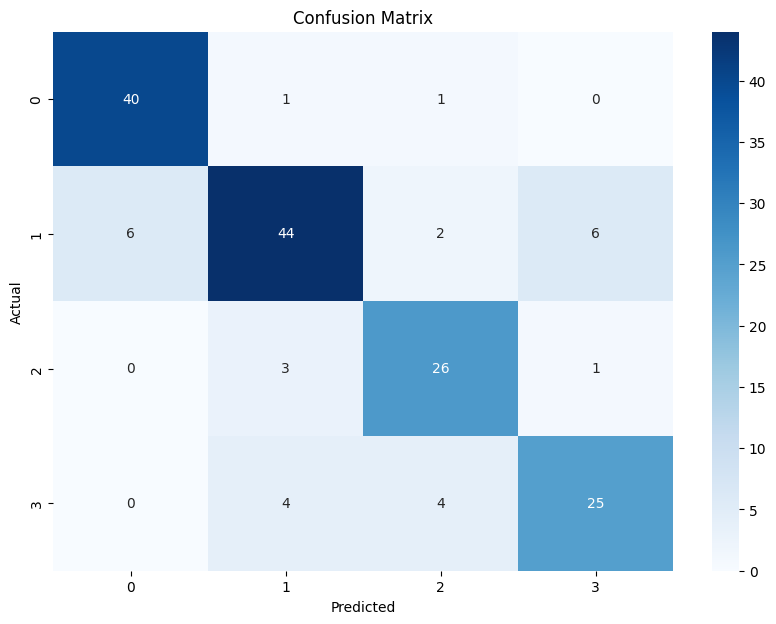

In [27]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb, average='macro')
f1 = f1_score(y_test, y_pred_xgb, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8282208588957055
Precision: 0.8212119628559846
Recall: 0.8338110165696373
F1-Score: 0.8259


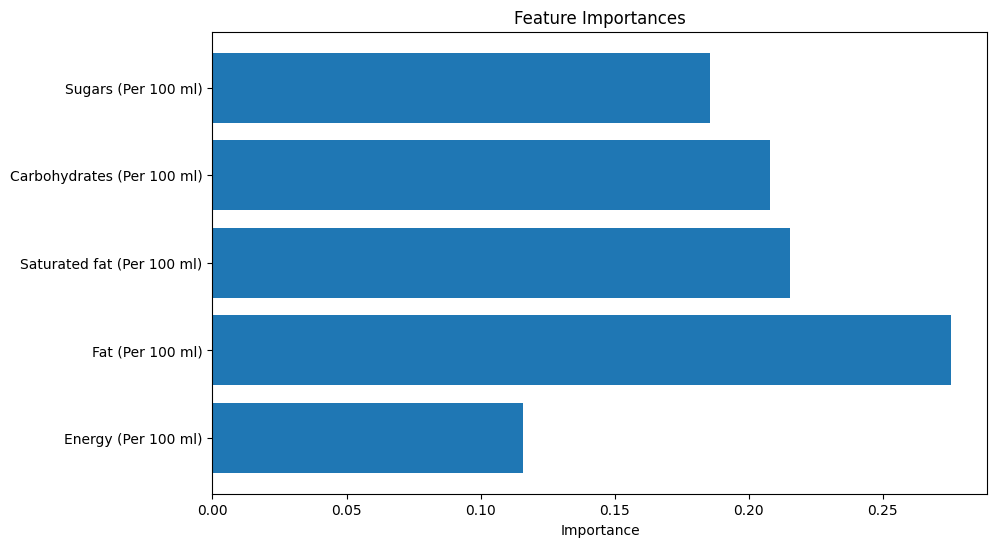

In [29]:
feature_importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(features_used, feature_importances, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

SVM (*Support Vector Machine*)
---
---

Muhammad Faisal Rafi 5025231295

Akurasi Model: 61.96%
Precision: 0.4742351046698873
Recall: 0.5907971339005822
F1-Score: 0.5215

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.56      0.60      0.58        58
           2       0.00      0.00      0.00        30
           3       0.54      0.88      0.67        33

    accuracy                           0.62       163
   macro avg       0.47      0.59      0.52       163
weighted avg       0.51      0.62      0.56       163



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

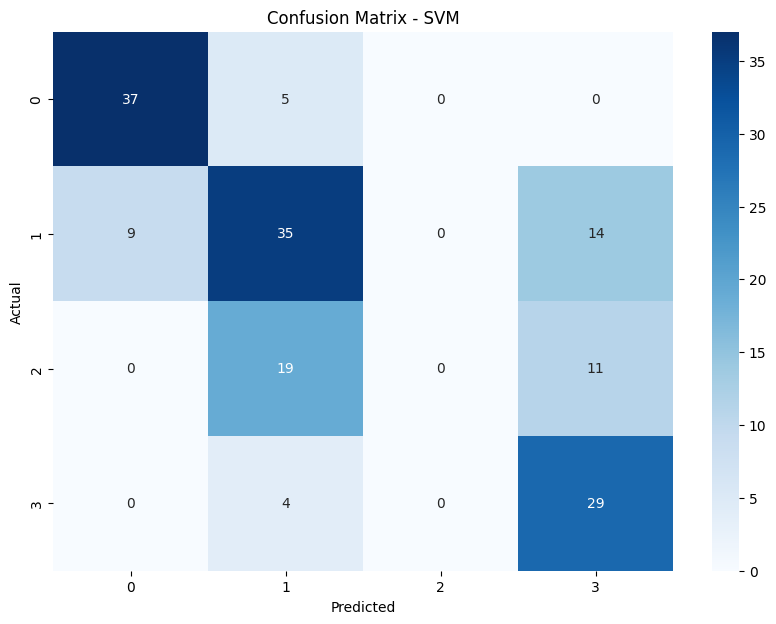

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
svm_accuracy = round(accuracy_score(y_test, y_pred_svm), 4) * 100
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')
f1 = f1_score(y_test, y_pred_svm, average='macro')

print(f"Akurasi Model: {svm_accuracy}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


---
#Model Comparison
---

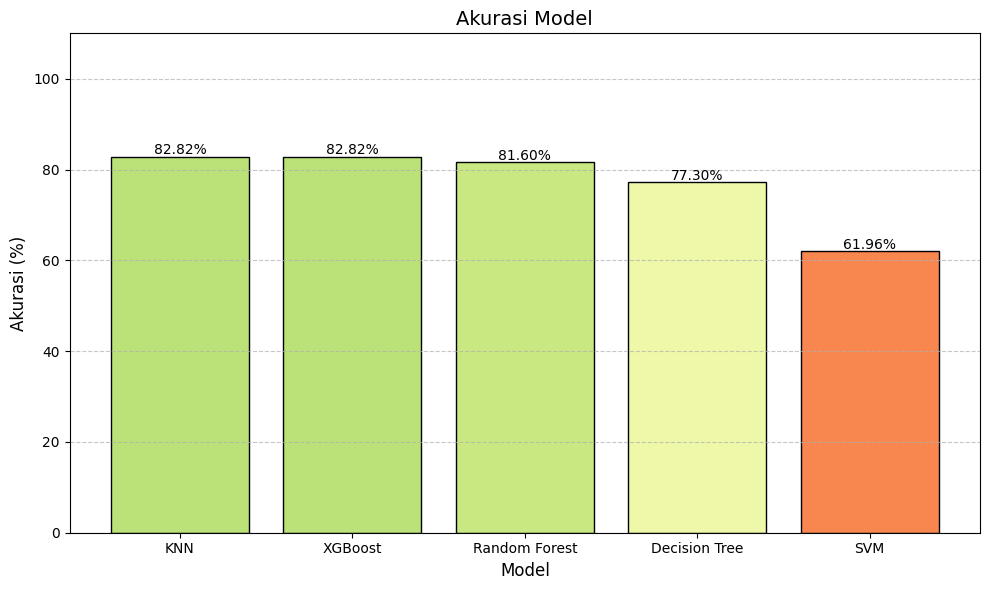

In [31]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

model_names = ['Decision Tree', 'KNN', 'Random Forest', 'XGBoost', 'SVM']
model_accuracies = [dt_accuracy, knn_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy]

sorted_models = sorted(zip(model_names, model_accuracies), key=lambda x: x[1], reverse=True)
model_names_sorted, model_accuracies_sorted = zip(*sorted_models)

acc_array = np.array(model_accuracies_sorted)
normalized = (acc_array - 50) / 50
normalized = np.clip(normalized, 0, 1)

colors = cm.RdYlGn(normalized)

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names_sorted, model_accuracies_sorted, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', fontsize=10)

plt.title('Akurasi Model', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#Parameter Tuning
---

**Decision Tree**
---
---

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 21)),
    'min_samples_split': [2, 5, 10]
}

dtc = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

dt_accuracy = round(accuracy_score(y_test, y_pred), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {dt_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Parameter Terbaik: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 2}
Akurasi Model Terbaik: 75.46000000000001%
Confusion Matrix:
 [[38  3  1  0]
 [ 8 41  3  6]
 [ 0  8 20  2]
 [ 0  7  2 24]]
Precision: 0.7535439263595021
Recall: 0.754601226993865
F1 Score: 0.752884062086516


**KNN**
---
---

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_

y_pred_knn = best_knn_model.predict(X_test)

knn_accuracy = round(accuracy_score(y_test, y_pred_knn), 4) * 100
print(f"Best k (n_neighbors): {best_k}")
print(f"Akurasi Model Terbaik: {knn_accuracy}%")

cm = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm)

print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

Best k (n_neighbors): 1
Akurasi Model Terbaik: 82.82000000000001%
Confusion Matrix:
 [[39  2  1  0]
 [ 6 43  3  6]
 [ 0  1 28  1]
 [ 0  4  4 25]]
Precision: 0.8306416155419224
Recall: 0.8282208588957055
F1 Score: 0.8262547143444118


**Random Forest**
---
---

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_rf = best_rf.predict(X_test)

rf_accuracy = round(accuracy_score(y_test, y_pred_rf), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {rf_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Parameter Terbaik: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Akurasi Model Terbaik: 81.6%
Confusion Matrix:
 [[40  1  1  0]
 [ 5 43  3  7]
 [ 0  3 25  2]
 [ 0  5  3 25]]
Precision: 0.8159329918848144
Recall: 0.8159509202453987
F1 Score: 0.8146414617138988


**XGBoost**
---
---

Helsa Sriprameswari Putri - 5025221154

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

param_grid = {
    'max_depth': [3, 6, 9, 11],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred_xgb = best_xgb.predict(X_test)

xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb), 4) * 100
print(f"Parameter Terbaik: {best_params}")
print(f"Akurasi Model Terbaik: {xgb_accuracy}%")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Parameter Terbaik: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Akurasi Model Terbaik: 82.21000000000001%
Confusion Matrix:
 [[40  1  1  0]
 [ 5 43  3  7]
 [ 0  2 26  2]
 [ 0  4  4 25]]
Precision: 0.8246577649464695
Recall: 0.8220858895705522
F1 Score: 0.8209063835091986


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**SVM (*Support Vector Machine*)**
---
---

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Parameter Terbaik: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Akurasi Model Terbaik: 66.25999999999999%
Confusion Matrix:
 [[41  0  1  0]
 [11 39  0  8]
 [ 0 17  2 11]
 [ 0  7  0 26]]
Precision: 0.663109283354682
Recall: 0.6625766871165644
F1 Score: 0.6114300077347864


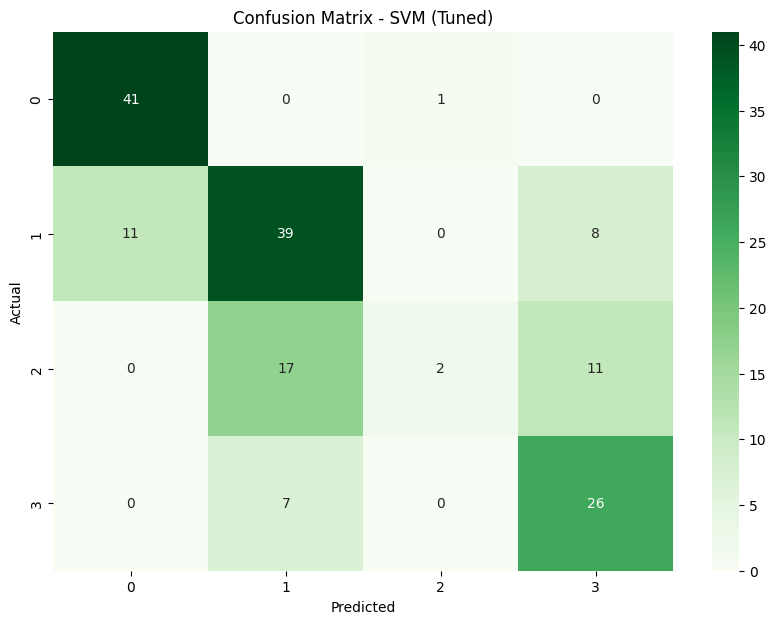

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definisi parameter grid untuk SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Inisialisasi model
svm = SVC(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Ambil model terbaik
best_svm = grid_search.best_estimator_
y_pred_svm_tuned = best_svm.predict(X_test)

# Evaluasi
svm_accuracy = round(accuracy_score(y_test, y_pred_svm_tuned), 4) * 100
print(f"Parameter Terbaik: {grid_search.best_params_}")
print(f"Akurasi Model Terbaik: {svm_accuracy}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_tuned))
print("Precision:", precision_score(y_test, y_pred_svm_tuned, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm_tuned, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm_tuned, average='weighted'))

# Visualisasi confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_tuned), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Tuned)')
plt.show()


---
#**Model Acuracy after parameter Tuning**
---

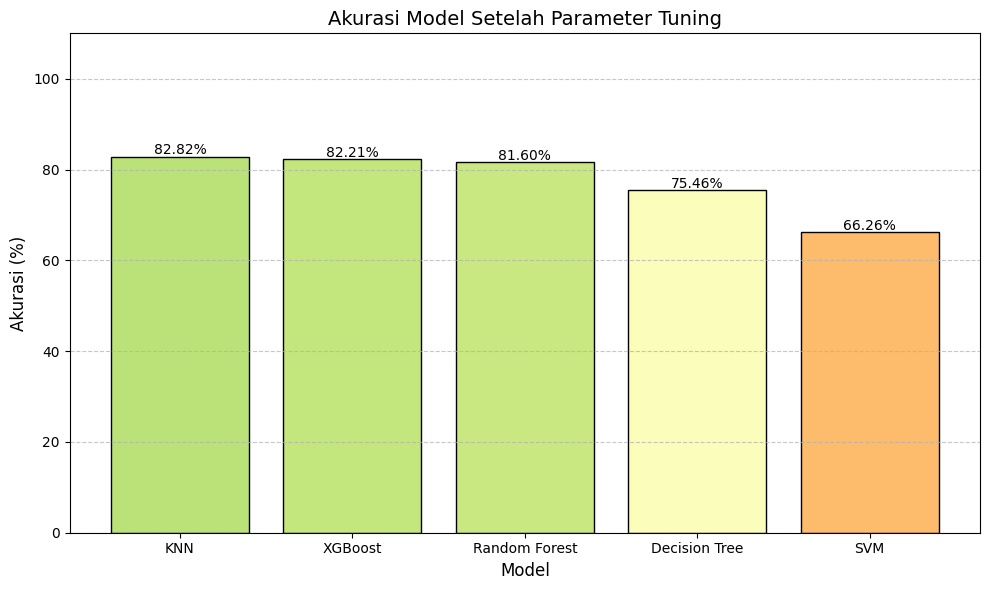

In [38]:
import matplotlib.cm as cm
model_names = ['Decision Tree', 'KNN', 'Random Forest', 'XGBoost', 'SVM']
model_accuracies = [dt_accuracy, knn_accuracy, rf_accuracy, xgb_accuracy, svm_accuracy]

sorted_models = sorted(zip(model_names, model_accuracies), key=lambda x: x[1], reverse=True)
model_names_sorted, model_accuracies_sorted = zip(*sorted_models)

acc_array = np.array(model_accuracies_sorted)
normalized = (acc_array - 50) / 50
normalized = np.clip(normalized, 0, 1)

colors = cm.RdYlGn(normalized)

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names_sorted, model_accuracies_sorted, color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', fontsize=10)

plt.title('Akurasi Model Setelah Parameter Tuning', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
